<a href="https://colab.research.google.com/github/Manju1803-a11y/SIC_AIML/blob/main/SIC_pro_084.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer


Load the Dataset

In [52]:
# Upload file in Colab manually or use drive
df = pd.read_csv("literacy_rate.csv")

df.head()


,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,adult_education_programs,language_diversity,region_type,government_stability,literacy_rate_percent
0,4.847706,70.937794,20098.745559,503.001686,0.526940,35.269097,90.755242,NaN,NaN,Bilingual,Least Developed,High,66.516441
1,7.281657,64.538697,50606.686295,737.794798,0.524418,NaN,90.197009,0.500205,Extensive,Multilingual,Least Developed,NaN,85.431091
2,3.833110,63.533592,53415.197757,NaN,0.855385,16.078349,60.915648,0.921771,NaN,Monolingual,Developing,Low,67.063415
3,NaN,37.964468,10943.100757,343.572155,0.864194,40.721066,28.890170,0.862589,Limited,NaN,Developing,High,58.288996
4,2.697866,74.761894,26233.323359,753.260001,0.932270,38.795291,72.056473,0.682091,Extensive,NaN,Least Developed,Low,87.016369


Basic Data Analysis

In [53]:
# Shape of dataset
print("Shape:", df.shape)

# Data info
df.info()

# Statistical summary
df.describe()


Shape: (1000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_spending_percent_gdp  948 non-null    float64
 1   urbanization_rate               961 non-null    float64
 2   avg_income_usd                  948 non-null    float64
 3   population_density              948 non-null    float64
 4   school_availability_index       958 non-null    float64
 5   teacher_student_ratio           960 non-null    float64
 6   internet_penetration            956 non-null    float64
 7   gender_equality_index           954 non-null    float64
 8   adult_education_programs        658 non-null    object 
 9   language_diversity              941 non-null    object 
 10  region_type                     932 non-null    object 
 11  government_stability            951 non-null    object 
 12  literacy_rate_per

,education_spending_percent_gdp,urbanization_rate,avg_income_usd,population_density,school_availability_index,teacher_student_ratio,internet_penetration,gender_equality_index,literacy_rate_percent
count,948.000000,961.000000,948.000000,948.000000,958.000000,960.000000,956.000000,954.000000,948.000000
mean,5.009396,57.323089,31177.070608,524.953319,0.746525,32.969899,53.311175,0.750029,75.104038
std,1.723709,21.397415,17115.832929,280.284891,0.145022,10.081559,25.295793,0.145541,14.485936
min,2.007020,20.136103,1099.270731,10.005536,0.500786,15.027052,10.196043,0.500181,50.077177
25%,3.507264,38.551338,17102.750056,291.553502,0.617672,24.478591,29.711495,0.620443,62.794725
50%,5.040999,56.925740,30303.444986,539.333646,0.746127,33.725627,54.072282,0.751680,75.011285
75%,6.485350,75.290713,46075.592211,754.775633,0.872841,41.501868,75.663187,0.878687,87.564312
max,7.996891,94.992695,59993.965682,998.467278,0.999491,49.953992,94.959967,0.999898,99.969744


Missing Value Analysis

In [54]:
# Check missing values
df.isnull().sum()


,0
education_spending_percent_gdp,52
urbanization_rate,39
avg_income_usd,52
population_density,52
school_availability_index,42
teacher_student_ratio,40
internet_penetration,44
gender_equality_index,46
adult_education_programs,342
language_diversity,59


Separate Features and Target

In [55]:
X = df.drop("literacy_rate_percent", axis=1)
y = df["literacy_rate_percent"]


Identify Numerical & Categorical Columns

In [56]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['education_spending_percent_gdp', 'urbanization_rate', 'avg_income_usd',
       'population_density', 'school_availability_index',
       'teacher_student_ratio', 'internet_penetration',
       'gender_equality_index'],
      dtype='object')
Categorical Columns: Index(['adult_education_programs', 'language_diversity', 'region_type',
       'government_stability'],
      dtype='object')


Data Imputation & Encoding Pipeline

In [57]:
# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


EDA – Data Visualization
>Literacy Rate Distribution

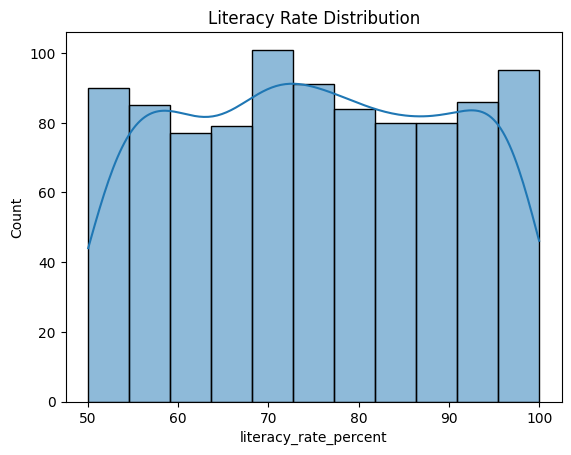

In [58]:
plt.figure()
sns.histplot(df["literacy_rate_percent"], kde=True)
plt.title("Literacy Rate Distribution")
plt.show()


Literacy vs Income

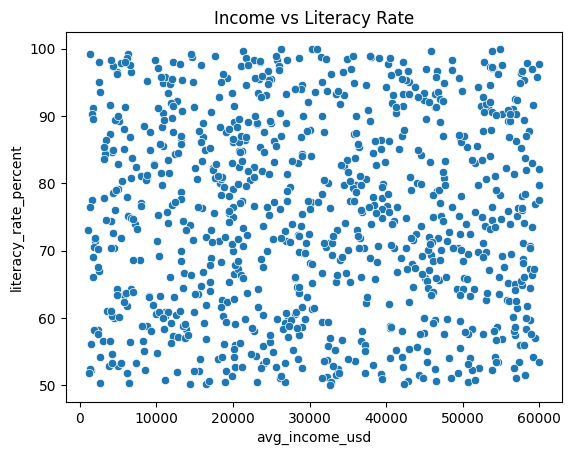

In [59]:
plt.figure()
sns.scatterplot(x=df["avg_income_usd"], y=df["literacy_rate_percent"])
plt.title("Income vs Literacy Rate")
plt.show()


Correlation Heatmap

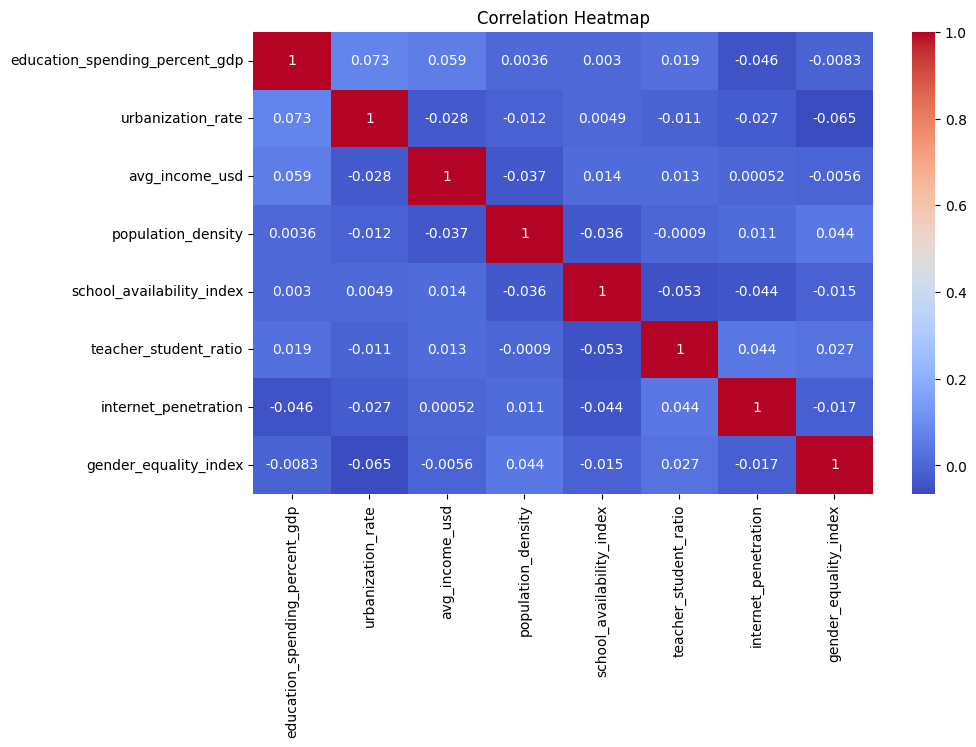

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Regressiom Model
>Train-test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Create a mask for non-NaN values in y_train
not_nan_mask_train = ~y_train.isna()
X_train_filtered = X_train[not_nan_mask_train]
y_train_filtered = y_train[not_nan_mask_train]

lin_reg.fit(X_train_filtered, y_train_filtered)

# Create a mask for non-NaN values in y_test for consistent evaluation
not_nan_mask_test = ~y_test.isna()
X_test_filtered = X_test[not_nan_mask_test]
y_test_filtered = y_test[not_nan_mask_test]

y_pred = lin_reg.predict(X_test_filtered)

print("R2 Score:", r2_score(y_test_filtered, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_filtered, y_pred)))

R2 Score: 0.012893128524348763
RMSE: 14.68702946648382


Rondom Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

rf_reg.fit(X_train_filtered, y_train_filtered)

y_pred_rf = rf_reg.predict(X_test_filtered)

print("Random Forest R2 Score:", r2_score(y_test_filtered, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_filtered, y_pred_rf)))

Random Forest R2 Score: -0.03733051153479838
Random Forest RMSE: 15.056029420621778


Ridge & Lasso Regression

In [64]:
from sklearn.linear_model import Ridge, Lasso

ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1.0))
])

lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Lasso(alpha=0.01))
])

ridge.fit(X_train_filtered, y_train_filtered)
lasso.fit(X_train_filtered, y_train_filtered)

print("Ridge R2:", ridge.score(X_test_filtered, y_test_filtered))
print("Lasso R2:", lasso.score(X_test_filtered, y_test_filtered))

Ridge R2: 0.0128935962648975
Lasso R2: 0.013007100222303003


Convert Regression to Classification

In [65]:
# Create literacy categories
def literacy_category(val):
    if val < 60:
        return "Low"
    elif val < 80:
        return "Medium"
    else:
        return "High"

df["literacy_class"] = df["literacy_rate_percent"].apply(literacy_category)

X = df.drop(["literacy_rate_percent", "literacy_class"], axis=1)
y = df["literacy_class"]


Classification Models

In [66]:
from sklearn.metrics import accuracy_score, classification_report


Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_reg = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.41
              precision    recall  f1-score   support

        High       0.45      0.67      0.54        88
         Low       0.00      0.00      0.00        43
      Medium       0.33      0.33      0.33        69

    accuracy                           0.41       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.31      0.41      0.35       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Using Neural Network (ANN)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


Prepare Data for ANN

In [69]:
# Transform features
X_processed = preprocessor.fit_transform(X)

# Encode target
y_encoded = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42
)


Build ANN Model

In [70]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train ANN Model

In [71]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3536 - loss: 1.1101 - val_accuracy: 0.3250 - val_loss: 1.0936
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4127 - loss: 1.0444 - val_accuracy: 0.3750 - val_loss: 1.0838
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4379 - loss: 1.0291 - val_accuracy: 0.4062 - val_loss: 1.0773
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4629 - loss: 1.0212 - val_accuracy: 0.4000 - val_loss: 1.0768
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4610 - loss: 1.0226 - val_accuracy: 0.3938 - val_loss: 1.0754
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5347 - loss: 1.0163 - val_accuracy: 0.4000 - val_loss: 1.0781
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5248 - loss: 0.9868 - val_accuracy: 0.3812 - val_loss: 1.0785
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5301 - loss: 0.9993 - val_accuracy: 0.3812 - val_l

Evaluate ANN Model

In [72]:
loss, accuracy = model.evaluate(X_test, y_test)
print("ANN Accuracy:", accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4578 - loss: 1.1289  
ANN Accuracy: 0.4050000011920929


Clustering


In [73]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)


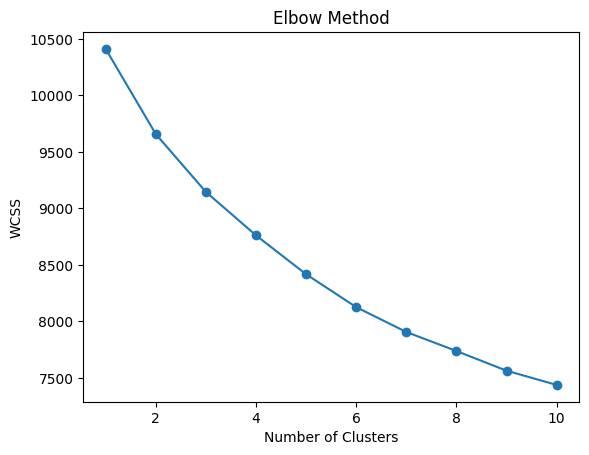

In [74]:
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [75]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

df["Cluster_KMeans"] = clusters


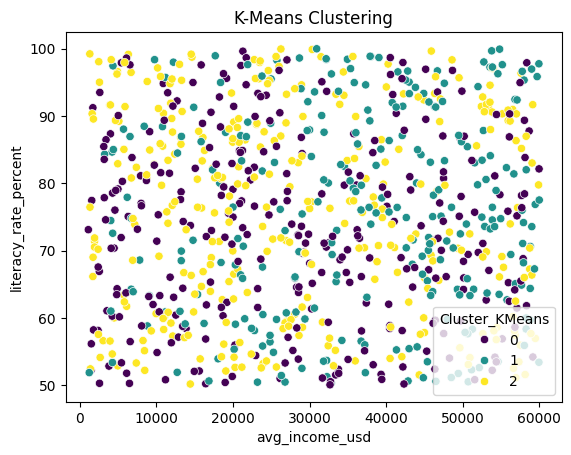

In [76]:
plt.figure()
sns.scatterplot(
    x=df["avg_income_usd"],
    y=df["literacy_rate_percent"],
    hue=df["Cluster_KMeans"],
    palette="viridis"
)
plt.title("K-Means Clustering")
plt.show()


In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage



In [78]:
linked = linkage(X_processed, method="ward")

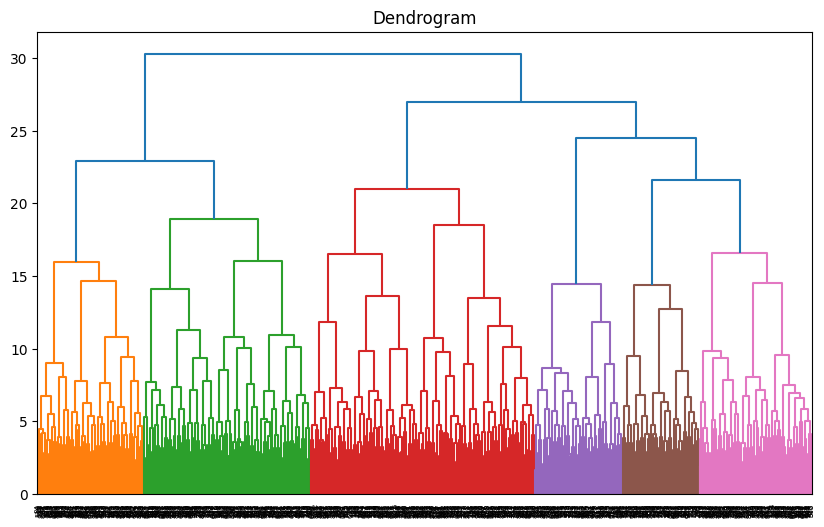

In [79]:
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()


In [80]:
from sklearn.cluster import DBSCAN


In [81]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_processed)

df["Cluster_DBSCAN"] = db_clusters


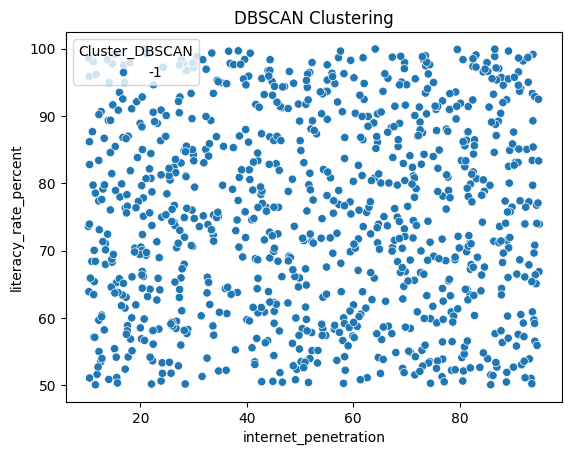

In [82]:
plt.figure()
sns.scatterplot(
    x=df["internet_penetration"],
    y=df["literacy_rate_percent"],
    hue=df["Cluster_DBSCAN"],
    palette="tab10"
)
plt.title("DBSCAN Clustering")
plt.show()
